In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import division

In [2]:
import requests
from StringIO import StringIO

In [3]:
url = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)
#To avoid StringIO error with Pandas

In [4]:
poll_df = pd.read_csv(poll_data)

In [6]:
poll_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [5]:
poll_df.head()
#where Partisan refers to strong supporter 

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


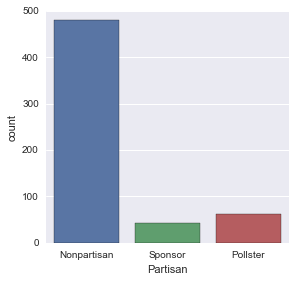

In [6]:
sns.factorplot('Partisan', data=poll_df, kind='count')
#Throws error without kind attribute

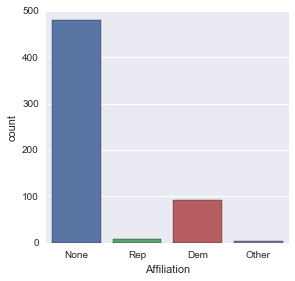

In [26]:
sns.factorplot('Affiliation', data=poll_df, kind='count')
#Throws error without kind attribute

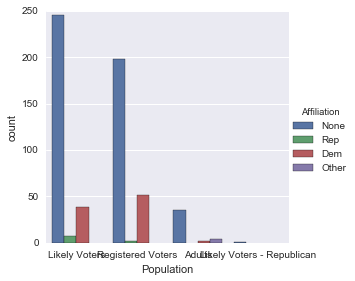

In [29]:
sns.factorplot('Population', data=poll_df, kind='count', hue='Affiliation')
#Throws error without kind attribute

In [73]:
avg = pd.DataFrame(poll_df.mean())
#gives mean of each column which has numeric data type

In [74]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [75]:
avg.drop('Number of Observations',axis=0, level=None, inplace=True, errors='raise')
avg.drop('Question Text',axis=0, level=None, inplace=True, errors='raise')
avg.drop('Question Iteration',axis=0, level=None, inplace=True, errors='raise')

In [76]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [78]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0, level=None, inplace=True, errors='raise')
std.drop('Question Text',axis=0, level=None, inplace=True, errors='raise')
std.drop('Question Iteration',axis=0, level=None, inplace=True, errors='raise')
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b3a51d0>], dtype=object)

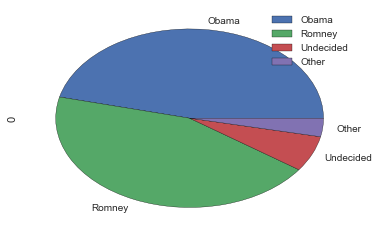

In [90]:
avg.plot(kind='pie',subplots=True)
#Plotting with error bars, xerr and yerr keyword arguments to plot().
#The way to do so for Dataframes is using yerr = a DataFrame of errors with column names matching the columns attribute of the plotting DataFrame
#Similarly, here the column names of 'avg' (plotting DF) and 'std' (errors DF) match

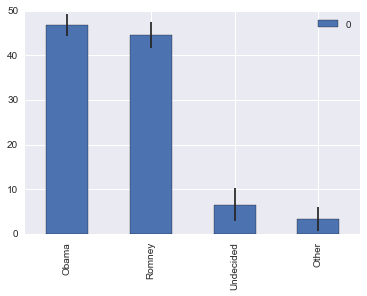

In [91]:
avg.plot(yerr=std,kind='bar')
#Plotting with error bars, xerr and yerr keyword arguments to plot().
#The way to do so for Dataframes is using yerr = a DataFrame of errors with column names matching the columns attribute of the plotting DataFrame
#Similarly, here the column names of 'avg' (plotting DF) and 'std' (errors DF) match

- IMPORTANT
Undecided could make a big difference since averages are close and both are between standard deviations of each other 

In [109]:
new = pd.concat([avg,std], axis=1)
#Which axis do we want to concatenate along?
new.columns = ['Average','Std Dev']
new

,Average,Std Dev
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [111]:
#Close race, what about Undecided candidates?
#Split difference between Obama and Romney?

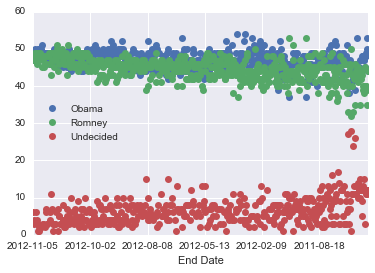

In [120]:
#Time analysis of favour between Obama and Romney
poll_df.plot(y=['Obama','Romney','Undecided'], x='End Date',marker='o',linestyle='')
#Choose axes carefully, to have numeric data on the Y axis and categorical on X

In [7]:
from datetime import datetime

In [8]:
poll_df['Difference']=(poll_df['Obama']-poll_df['Romney'])/100
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1,0.01
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02


In [9]:
#How does the Difference change over time?
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
#Index is important to retain it as otherwise, index would equal Start Date
#Take mean of results on that particular start date, since multiple polls will have same start date

In [138]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


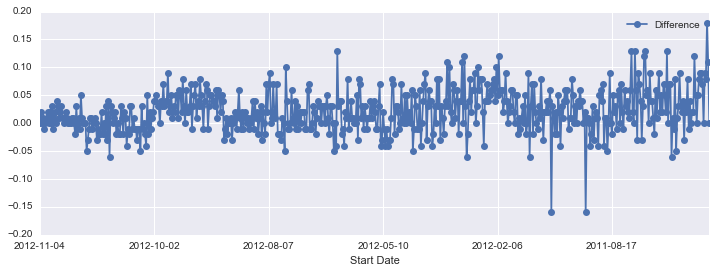

In [9]:
poll_df.plot('Start Date', 'Difference',marker='o',linestyle='-',figsize=(12,4))
#figsize important for good display

In [144]:
#Analyze when the dips occured, what triggered Romney to get ahead of these dates?

In [146]:
#For month of October (when the debates took place), what was the difference like?
#Create loop to find readings for October

xlimit=[]
row_in=0

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print xlimit

[325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352]


In [149]:
print max(xlimit)
print min(xlimit)

352
325


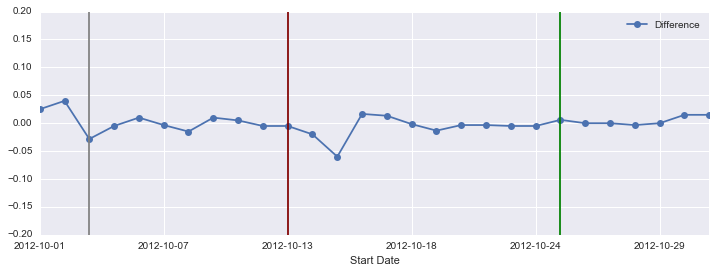

In [157]:
poll_df.plot('Start Date', 'Difference',marker='o',linestyle='-',figsize=(12,4), xlim=(325,352))
#Plot specific dates of debates
plt.axvline(x=325+2,color='grey')
plt.axvline(x=325+10,color='maroon')
plt.axvline(x=325+21,color='green')

In [ ]:
#How does this match with performances of the candidates at the debates?

Donor Dataset

In [10]:
pwd

u'/Users/shambhavikumar/Documents/Python Udemy Notebook'

In [11]:
donor_data = pd.read_csv('Election_Donor_Data.csv')

/Users/shambhavikumar/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [12]:
donor_data['contb_receipt_amt'].value_counts().head()
#Top 5 most commonly donated amounts -> 178188 people donated $100

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

In [13]:
donor_data['contb_receipt_amt'].value_counts().tail()
#Not round numbers

24.04     1
236.90    1
92.30     1
58.41     1
108.90    1
Name: contb_receipt_amt, dtype: int64

In [14]:
don_mean = donor_data['contb_receipt_amt'].mean()
don_std = donor_data['contb_receipt_amt'].std()
print don_mean
print don_std
#HUGE std dev, what could be wrong?

298.235150095
3749.66672327


In [17]:
top_donor = donor_data['contb_receipt_amt'].copy()
top_donor.sort()
top_donor
#Negative values indicate refunds
#High std dev due to negative values and extremely high donations

/Users/shambhavikumar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [18]:
top_donor =top_donor[top_donor > 0]
top_donor.sort()
top_donor

/Users/shambhavikumar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


334504          0.01
321779          0.01
323547          0.01
325614          0.01
326100          0.01
325982          0.01
318560          0.01
325986          0.01
325429          0.01
323822          0.01
348154          0.01
329984          0.01
320749          0.01
320784          0.01
326053          0.01
325758          0.01
317753          0.01
325344          0.01
323661          0.01
319373          0.01
321025          0.01
326172          0.01
336020          0.01
335424          0.01
345103          0.01
323823          0.01
320309          0.01
325975          0.01
325973          0.01
321676          0.01
             ...    
99829       10000.00
709268      10000.00
708928      10000.00
710730      10000.00
709813      10000.00
41888       10000.00
708138      10000.00
923476      10000.00
709739      10000.00
708919      10000.00
709608      10000.00
876244      10000.00
710177      10000.00
708898      10000.00
708022      10000.00
711167      10000.00
710198      1

In [19]:
top_donor.value_counts().head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

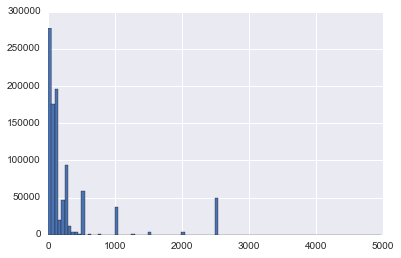

In [20]:
com_don = top_donor[top_donor < 5000]
com_don.hist(bins=100)

In [21]:
candidates = donor_data['cand_nm'].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [22]:
Party = pd.Series([])
donor_data['Party'] = Party



In [23]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_data['Party'] = donor_data.cand_nm.map(party_map)

In [27]:
#To not display refunds, only select those rows where receipt amount is positive
#Redefine dataframe entirely by removing these refund values
donor_data = donor_data[donor_data.contb_receipt_amt > 0]
donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [30]:
#Number of donors for each candidate
#Using GroupBy for candidate and displaying the Count(Amount)
donor_data.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [31]:
#Sum of amount donated by donors for each candidate
#Using GroupBy for candidate and displaying the Sum(Amount)
donor_data.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [36]:
#donor_data[['contb_receipt_amt']].apply(pd.to_numeric)

In [38]:
#donor_data.groupby('cand_nm')['contb_receipt_amt'].sum().apply(pd.to_numeric)

In [46]:
donor_amounts = donor_data.groupby('cand_nm')['contb_receipt_amt'].sum().astype(int)
donor_amounts

cand_nm
Bachmann, Michelle                  2711439
Cain, Herman                        7101081
Gingrich, Newt                     12832769
Huntsman, Jon                       3330373
Johnson, Gary Earl                   566961
McCotter, Thaddeus G                  39030
Obama, Barack                     135877427
Paul, Ron                          21009619
Pawlenty, Timothy                   6004819
Perry, Rick                        20305753
Roemer, Charles E. 'Buddy' III       373009
Romney, Mitt                       88335907
Santorum, Rick                     11043159
Name: contb_receipt_amt, dtype: int64

# Donation Amounts to Each Candidate

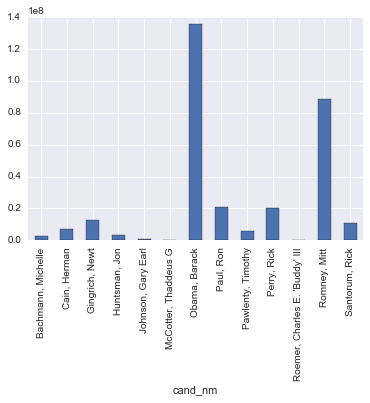

In [47]:
donor_amounts.plot(kind='bar')

In [ ]:
#To compare donations to Republicans vs Democrats

In [53]:
party_donations = donor_data.groupby('Party')['contb_receipt_amt'].sum().astype(int)
party_donations

Party
Democrat      135877427
Republican    173653926
Name: contb_receipt_amt, dtype: int64

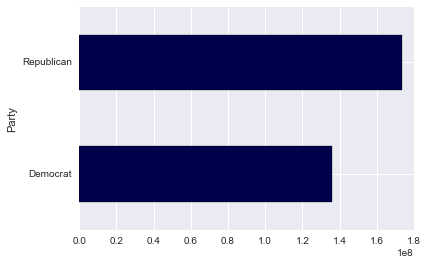

In [101]:
#How to use different colors for different bars?
party_donations.plot(kind='barh', cmap='seismic')

In [97]:
#Pivot tables for analysing occupation-wise donations
occupation_df = donor_data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')

In [106]:
#occupation_df = occupation_df[occupation_df.Democrat > 100]
#occupation_df.sum(1)
#method sum will return sum for requested axis, here axis of index would mean sum(0) and axis of columns is sum(1)
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


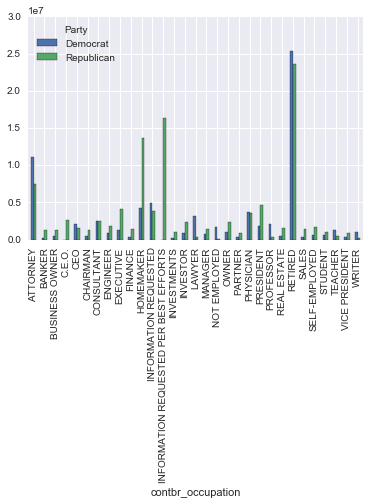

In [99]:
occupation_df.plot(kind='bar')

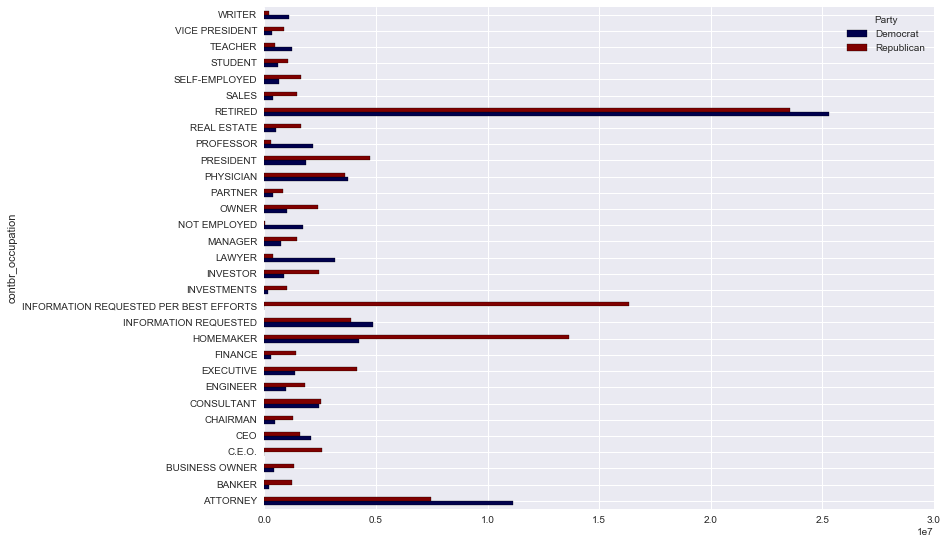

In [105]:
occupation_df.plot(kind='barh',cmap='seismic',figsize=(12,9))
#Easier to read labels in BARH kind of plot

In [109]:
occupation_df.loc['CEO'] = occupation_df.loc['C.E.O.'] + occupation_df.loc['CEO']
#DataFrame.loc is a purely label-location based indexer for selection by label.

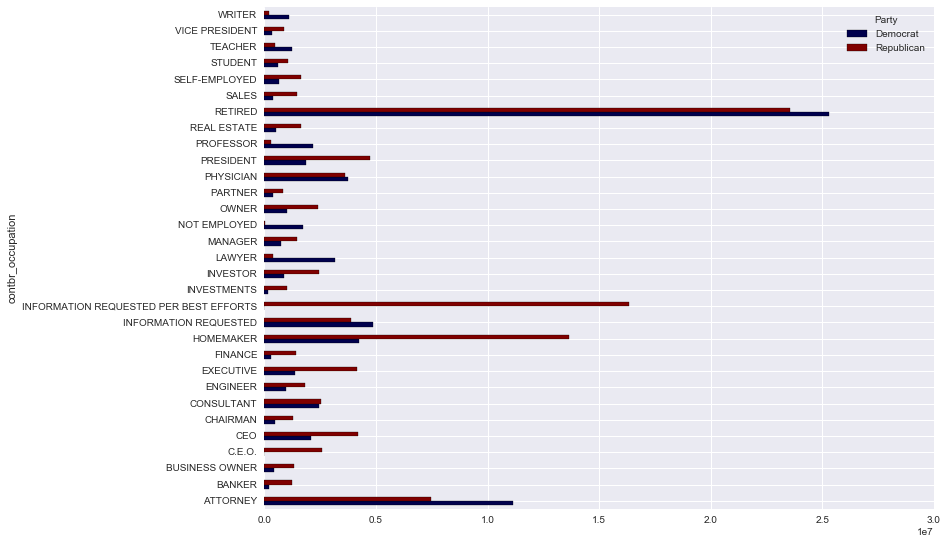

In [110]:
occupation_df.plot(kind='barh',cmap='seismic',figsize=(12,9))